In [170]:
import numpy as np 
import pandas as pd 
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [172]:
data = pd.read_csv("student-mat.csv", sep = ";") #read the csv file
print(data) # print the csv file 


    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

In [174]:
data = data[["G1", "G2", "G3", "studytime", "failures", "health"]] #the data I chose to showcase

predict = "G3" # predict the third grade

X = np.array(data.drop([predict], axis = 1)) # drop the predictions for the third grade column
y = np.array(data[predict])

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1) # 10% test size 

linear = linear_model.LinearRegression() # the type of regression used 
linear.fit(x_train, y_train) # determine the best fitting straight line
acc = linear.score(x_test, y_test) # accuracy check

print(acc)

# the values of coefficients and intercept used on the line
print('coefficients: \n', linear.coef_)
print('intercept: \n', linear.intercept_)
print("\n")

predictions = linear.predict(x_test) # predictions of x_test on the line

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])


0.7799069703325661
coefficients: 
 [ 0.16054653  0.9808334  -0.23823251 -0.24015096  0.05842061]
intercept: 
 -1.490546772208651


10.719724055619116 [10 11  2  0  5] 11
11.985751417668668 [14 12  2  1  3] 12
9.323477860466516 [10 10  2  1  2] 0
19.049742061433122 [18 18  1  0  4] 18
12.768801488728538 [12 13  2  0  1] 12
7.280868939670086 [8 8 2 0 2] 0
8.46140412429738 [10  9  3  0  4] 10
8.505109436127164 [11  9  3  0  2] 10
19.030476696027982 [19 18  2  0  5] 18
-1.3543964272336224 [5 0 1 3 5] 0
-0.2299899305033537 [9 0 2 0 5] 0
10.642038079054739 [11 11  3  0  5] 10
9.023568603812436 [ 7 10  2  0  1] 11
8.261702344395012 [8 9 2 0 2] 10
9.505208206257228 [10 10  2  0  1] 10
10.001563108031476 [12 10  2  0  4] 11
14.308960472462633 [14 14  1  0  1] 13
9.26242562946891 [10 10  4  0  5] 11
8.75805724616926 [10  9  2  0  5] 10
11.963229917481332 [12 12  2  0  4] 11
5.838285812849333 [7 7 4 0 5] 6
15.610886945484092 [16 15  1  0  1] 16
12.841937399217235 [11 13  2  0  5] 13
12.8856427110

Text(0, 0.5, 'predicted G3')

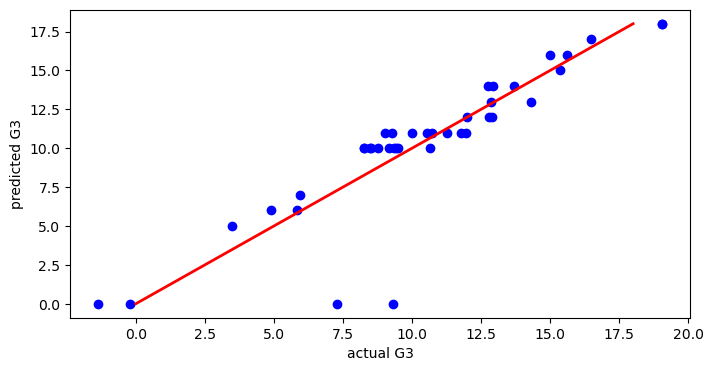

In [181]:
plt.figure(figsize = (8,4))
plt.scatter(predictions, y_test, color='blue', label='Data Points')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Fit')
plt.xlabel("actual G3")
plt.ylabel("predicted G3")
